In [2]:
import copy
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/santoshsaranyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Loading the dataset
df = pd.read_csv("data/Processed_Lyric_Dataset.csv")
df.head()

,Artist,SName,Lyric,Genre,LyricProcessed
0,Ivete Sangalo,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,pop,"[['feel', 'unsure'], ['take', 'hand', 'lead', ..."
1,Ivete Sangalo,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",pop,"[['let', 'fool', 'ya'], ['even', 'try', 'schoo..."
2,Ivete Sangalo,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",pop,"[['baby', 'let', 'cruise', 'away'], ['confuse'..."
3,Ivete Sangalo,Easy,"Know it sounds funny\nBut, I just can't stand ...",pop,"[['know', 'sound', 'funny'], ['cant', 'stand',..."
4,Ivete Sangalo,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,pop,"[['get', 'look'], ['one', 'hop', 'lad'], ['fac..."


In [ ]:
# Converting the String column into lists
df['LyricsList'] = df.apply(lambda x: eval(x['LyricProcessed']), axis=1)

# Converting the list of words into a single string with all words
df['LyricsProcessed'] = df['LyricsList'].apply(lambda x: (' '.join(list(map(' '.join, x)))))

In [8]:
df.head()

,Artist,SName,Lyric,Genre,LyricProcessed,LyricsList,LyricsProcessed
0,Ivete Sangalo,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,pop,"[['feel', 'unsure'], ['take', 'hand', 'lead', ...","[[feel, unsure], [take, hand, lead, dance, flo...",feel unsure take hand lead dance floor music d...
1,Ivete Sangalo,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",pop,"[['let', 'fool', 'ya'], ['even', 'try', 'schoo...","[[let, fool, ya], [even, try, school, ya, oh],...",let fool ya even try school ya oh weve get min...
2,Ivete Sangalo,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",pop,"[['baby', 'let', 'cruise', 'away'], ['confuse'...","[[baby, let, cruise, away], [confuse, way, cle...",baby let cruise away confuse way clear want ge...
3,Ivete Sangalo,Easy,"Know it sounds funny\nBut, I just can't stand ...",pop,"[['know', 'sound', 'funny'], ['cant', 'stand',...","[[know, sound, funny], [cant, stand, pain], [g...",know sound funny cant stand pain girl im leave...
4,Ivete Sangalo,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,pop,"[['get', 'look'], ['one', 'hop', 'lad'], ['fac...","[[get, look], [one, hop, lad], [face, beam], [...",get look one hop lad face beam smile get boast...


In [9]:
from sklearn import preprocessing

# Encoding the label
LabelEnc = preprocessing.LabelEncoder()
df['GenreEncoded'] = LabelEnc.fit_transform(df['Genre'])


In [10]:
df.head()

,Artist,SName,Lyric,Genre,LyricProcessed,LyricsList,LyricsProcessed,GenreEncoded
0,Ivete Sangalo,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,pop,"[['feel', 'unsure'], ['take', 'hand', 'lead', ...","[[feel, unsure], [take, hand, lead, dance, flo...",feel unsure take hand lead dance floor music d...,9
1,Ivete Sangalo,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",pop,"[['let', 'fool', 'ya'], ['even', 'try', 'schoo...","[[let, fool, ya], [even, try, school, ya, oh],...",let fool ya even try school ya oh weve get min...,9
2,Ivete Sangalo,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",pop,"[['baby', 'let', 'cruise', 'away'], ['confuse'...","[[baby, let, cruise, away], [confuse, way, cle...",baby let cruise away confuse way clear want ge...,9
3,Ivete Sangalo,Easy,"Know it sounds funny\nBut, I just can't stand ...",pop,"[['know', 'sound', 'funny'], ['cant', 'stand',...","[[know, sound, funny], [cant, stand, pain], [g...",know sound funny cant stand pain girl im leave...,9
4,Ivete Sangalo,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,pop,"[['get', 'look'], ['one', 'hop', 'lad'], ['fac...","[[get, look], [one, hop, lad], [face, beam], [...",get look one hop lad face beam smile get boast...,9


In [24]:
from gensim import models

# Loading the Word2Vec Embeddings
w2v_path = 'data/w2v_Embeddings.txt'
w2v_model = models.KeyedVectors.load_word2vec_format(w2v_path, binary=False)

In [22]:
# Loading the glove embeddings
glove_model = models.KeyedVectors.load_word2vec_format("data/glove.6B.200d.txt", binary=False, no_header=True)

In [25]:
# To replace the words with their indices in the dataset
def token_to_index(token):
    try:
        return w2v_model.key_to_index[token]
    except KeyError:
        return 0  # Index of 0 for unknown words

In [11]:
def token_to_index_glove(token):
    try:
        return glove_model.key_to_index[token]
    except KeyError:
        return 0  # Index of 0 for unknown words

In [26]:
from sklearn.model_selection import train_test_split

model_selection = "w2v"

# Splitting the dataset into training, validation and test sets
label_final = df['GenreEncoded']
label_final = label_final.drop(88392) # Dropping a row with an empty list
df_lyrics = df['LyricsProcessed'].apply(lambda x: x.split())
df_lyrics = df_lyrics.drop(88392)
if model_selection == "w2v":
    df_indices = df_lyrics.apply(lambda x: [token_to_index(token) for token in x])
else:
    df_indices = df_lyrics.apply(lambda x: [token_to_index_glove(token) for token in x])
df_train_valid, df_test, label_train_valid, label_test = train_test_split(df_indices.to_list(), label_final.to_list(), test_size=0.10, random_state=7)
df_train, df_valid, label_train, label_valid = train_test_split(df_train_valid, label_train_valid, test_size=0.10, random_state=7)

In [27]:
from torch.utils.data import Dataset
# Converting the dataframe into Torch's Text Dataset
class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return torch.tensor(self.X[index]), torch.tensor(self.y[index])

train_dataset = TextDataset(df_train, label_train)
valid_dataset = TextDataset(df_valid, label_valid)
test_dataset = TextDataset(df_test, label_test)


In [28]:
import torch
import torch.nn as nn
import torch.nn.utils.rnn as rnn_utils
from torch.utils.data import DataLoader
device = 'cpu'
batch_size = 32

# Splitting the dataset into batches and padding the vectors for equal length
def collate_batch(batch):
    X = [torch.tensor(item[0], dtype=torch.long) for item in batch]
    y = torch.tensor([item[1] for item in batch], dtype=torch.long)
    X_padded = rnn_utils.pad_sequence(X, batch_first=True, padding_value=0)
    lengths = torch.LongTensor([len(x) for x in X])
    return X_padded.to(device), y.to(device), lengths.to(device)

# DataLoader to load the data into the Torch Model
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, collate_fn=collate_batch)
test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_batch)



In [29]:
# Defining the LSTM Model
class LSTM(nn.Module):
    def __init__(self, given_model, num_classes, hidden_size=64, num_layers=2):
        super(LSTM, self).__init__()
        self.embedding_dim = given_model.vector_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(given_model.vectors)) # Using the embeddings trained previously
        self.lstm = nn.LSTM(self.embedding_dim, self.hidden_size, num_layers=self.num_layers, batch_first=True)
        self.fc = nn.Linear(self.hidden_size, num_classes)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x, lengths):
        x = self.embedding(x)
        x = self.dropout(x)
        #Packing the padded sequences for better computational performance
        packed_seq = rnn_utils.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
        _, (hidden, _) = self.lstm(packed_seq)
        output = self.fc(hidden[-1])
        return output.squeeze(0)


In [28]:
# Function to train the LSTM model and choose the best one based on validation performance
def train_model(model, num_epochs, adam_optimizer, training_loss_list, loss_fn, validation_loss_list, validation_accuracy_list, best_accuracy=0, best_weights=None):
    for epoch in range(num_epochs):
        print("Epoch :", epoch)
        model.train()
        training_loss = 0
        current_batch = 0
        for inputs, labels, lengths in train_loader:
            if current_batch % 500 == 0:
                print('Current batch: {} / {}'.format(current_batch + 1, len(train_loader)))
            current_batch += 1
            adam_optimizer.zero_grad()
            outputs = model(inputs, lengths)
            loss = loss_fn(outputs, labels)
            loss.backward()
            adam_optimizer.step()
            training_loss = training_loss + (loss.item() * inputs.size(0))
        training_loss = training_loss/len(train_loader.dataset)
        training_loss_list.append(training_loss)
        print("Training Loss: ", training_loss)

        # Testing performance on validation set
        model.eval()
        validation_loss = 0
        correct = 0
        total = 0
        current_batch = 0
        with torch.no_grad():
            for inputs, labels, lengths in valid_loader:
                if current_batch % 500 == 0:
                    print('Current batch: {} / {}'.format(current_batch+1, len(valid_loader)))
                current_batch += 1
                outputs = model(inputs, lengths)
                loss = loss_fn(outputs, labels)
                validation_loss = validation_loss + (loss.item()*inputs.size(0))
                _, predicted = outputs.max(1)
                total = total + labels.size(0)
                correct = correct + predicted.eq(labels).sum().item()
        validation_loss = validation_loss/len(valid_loader.dataset)
        validation_loss_list.append(validation_loss)
        validation_accuracy = correct/total
        validation_accuracy_list.append(validation_accuracy)

        # Get the best model parameters
        if validation_accuracy > best_accuracy:
            best_accuracy = validation_accuracy
            best_weights = copy.deepcopy(model.state_dict())

        print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.2f}%'
              .format(epoch+1, num_epochs, training_loss, validation_loss, 100*validation_accuracy))
    return best_weights

In [15]:
import torch.optim as optim
# Training model with w2v embeddings
learning_rate = 0.001
num_epochs = 25
hidden_size = 64
num_layers = 2
num_classes = len(set(label_final))

training_loss_list = []
validation_loss_list = []
validation_accuracy_list = []

best_accuracy = 0
best_weights = None

model = LSTM(w2v_model, num_classes, hidden_size=hidden_size, num_layers=num_layers)
adam_optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

best_weights=train_model(model, num_epochs, adam_optimizer, training_loss_list, loss_fn, validation_loss_list, validation_accuracy_list, best_accuracy, best_weights)
# Saving the best model parameters
model.load_state_dict(best_weights)
torch.save(model.state_dict(), 'LSTM_with_w2v.pth')

Epoch : 0
Current batch: 1 / 2904


<ipython-input-13-d4135abbdb5c>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = [torch.tensor(item[0], dtype=torch.long) for item in batch]


Current batch: 501 / 2904
Current batch: 1001 / 2904
Current batch: 1501 / 2904
Current batch: 2001 / 2904
Current batch: 2501 / 2904
Training Loss:  2.0253612697923162
Current batch: 1 / 323
Epoch [1/25], Train Loss: 2.0254, Val Loss: 1.9221, Val Acc: 40.62%
Epoch : 1
Current batch: 1 / 2904
Current batch: 501 / 2904
Current batch: 1001 / 2904
Current batch: 1501 / 2904
Current batch: 2001 / 2904
Current batch: 2501 / 2904
Training Loss:  1.8078923272797611
Current batch: 1 / 323
Epoch [2/25], Train Loss: 1.8079, Val Loss: 1.7703, Val Acc: 43.08%
Epoch : 2
Current batch: 1 / 2904
Current batch: 501 / 2904
Current batch: 1001 / 2904
Current batch: 1501 / 2904
Current batch: 2001 / 2904
Current batch: 2501 / 2904
Training Loss:  1.7051726142784807
Current batch: 1 / 323
Epoch [3/25], Train Loss: 1.7052, Val Loss: 1.6937, Val Acc: 44.37%
Epoch : 3
Current batch: 1 / 2904
Current batch: 501 / 2904
Current batch: 1001 / 2904
Current batch: 1501 / 2904
Current batch: 2001 / 2904
Current bat

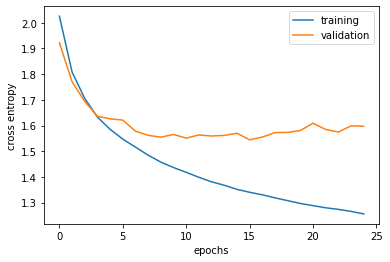

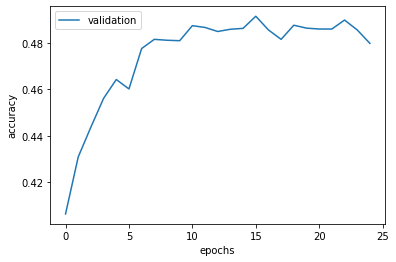

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

plt.plot(training_loss_list, label="training")
plt.plot(validation_loss_list, label="validation")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()
plt.savefig('Loss.png')

plt.plot(validation_accuracy_list, label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.savefig('Accuracy.png')

In [29]:
import torch.optim as optim
# Training model with glove embeddings
learning_rate = 0.001
num_epochs = 20
hidden_size = 64
num_layers = 2
num_classes = len(set(label_final))

training_loss_list = []
validation_loss_list = []
validation_accuracy_list = []

best_accuracy = 0
best_weights = None

model = LSTM(glove_model, num_classes, hidden_size=hidden_size, num_layers=num_layers)
adam_optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

best_weights=train_model(model, num_epochs, adam_optimizer, training_loss_list, loss_fn, validation_loss_list, validation_accuracy_list, best_accuracy, best_weights)
# Saving the best model parameters
model.load_state_dict(best_weights)
torch.save(model.state_dict(), 'LSTM_with_glove.pth')

Epoch : 0
Current batch: 1 / 2904


<ipython-input-26-d4135abbdb5c>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = [torch.tensor(item[0], dtype=torch.long) for item in batch]


Current batch: 501 / 2904
Current batch: 1001 / 2904
Current batch: 1501 / 2904
Current batch: 2001 / 2904
Current batch: 2501 / 2904
Training Loss:  2.0037140259912043
Current batch: 1 / 323
Epoch [1/20], Train Loss: 2.0037, Val Loss: 1.8637, Val Acc: 40.81%
Epoch : 1
Current batch: 1 / 2904
Current batch: 501 / 2904
Current batch: 1001 / 2904
Current batch: 1501 / 2904
Current batch: 2001 / 2904
Current batch: 2501 / 2904
Training Loss:  1.7815493688507111
Current batch: 1 / 323
Epoch [2/20], Train Loss: 1.7815, Val Loss: 1.7511, Val Acc: 42.75%
Epoch : 2
Current batch: 1 / 2904
Current batch: 501 / 2904
Current batch: 1001 / 2904
Current batch: 1501 / 2904
Current batch: 2001 / 2904
Current batch: 2501 / 2904
Training Loss:  1.6853584853918169
Current batch: 1 / 323
Epoch [3/20], Train Loss: 1.6854, Val Loss: 1.6932, Val Acc: 44.15%
Epoch : 3
Current batch: 1 / 2904
Current batch: 501 / 2904
Current batch: 1001 / 2904
Current batch: 1501 / 2904
Current batch: 2001 / 2904
Current bat

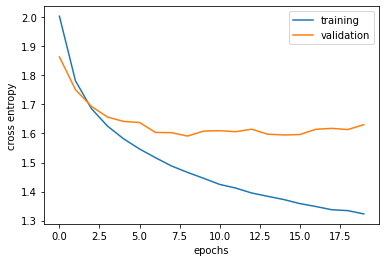

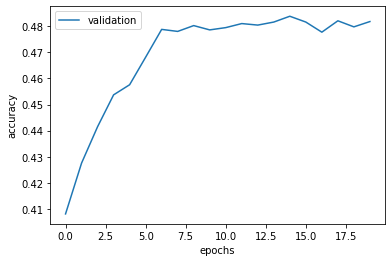

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt

plt.plot(training_loss_list, label="training")
plt.plot(validation_loss_list, label="validation")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()
plt.savefig('Loss.png')

plt.plot(validation_accuracy_list, label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.savefig('Accuracy.png')

In [22]:
from sklearn.metrics import precision_recall_fscore_support
# Function to evaluate the model performance on the test set
def evaluate(model, loss_fn):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    current_batch = 0
    predicted_list = []
    labels_list = []
    with torch.no_grad():
        for inputs, labels, lengths in test_loader:
            if current_batch % 500 == 0:
                print('Current batch: {} / {}'.format(current_batch+1, len(test_loader)))
            current_batch += 1
            outputs = model(inputs, lengths)
            loss = loss_fn(outputs, labels)
            test_loss = test_loss + (loss.item()*inputs.size(0))
            _, predicted = outputs.max(1)
            total = total + labels.size(0)
            correct = correct + predicted.eq(labels).sum().item()
            predicted_list.extend(predicted.tolist())
            labels_list.extend(labels.tolist())
    test_loss = test_loss/len(test_loader.dataset)
    test_accuracy = correct/total
    precision, recall, f1, _ = precision_recall_fscore_support(labels_list, predicted_list, average='weighted')

    print("Accuracy: ",test_accuracy)
    print("Precision: ",precision)
    print("Recall: ",recall)
    print("F1: ",f1)

In [30]:
# Testing model with word2vec embeddings
hidden_size = 64
num_layers = 2
num_classes = len(set(label_final))

model = LSTM(w2v_model, num_classes, hidden_size=hidden_size, num_layers=num_layers)

loss_fn = nn.CrossEntropyLoss()
model.load_state_dict(torch.load('LSTM_with_w2v.pth'))

<All keys matched successfully>

In [31]:
evaluate(model, loss_fn)

<ipython-input-28-d4135abbdb5c>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = [torch.tensor(item[0], dtype=torch.long) for item in batch]


Current batch: 1 / 359
Accuracy:  0.4941155958504054
Precision:  0.4762441866310503
Recall:  0.4941155958504054
F1:  0.46608393184709224


/Users/santoshsaranyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# Testing model with glove embeddings
hidden_size = 64
num_layers = 2
num_classes = len(set(label_final))

model = LSTM(glove_model, num_classes, hidden_size=hidden_size, num_layers=num_layers)

loss_fn = nn.CrossEntropyLoss()
model.load_state_dict(torch.load('LSTM_with_glove.pth'))

<All keys matched successfully>

In [23]:
evaluate(model, loss_fn)

<ipython-input-14-d4135abbdb5c>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = [torch.tensor(item[0], dtype=torch.long) for item in batch]


Current batch: 1 / 359
Accuracy:  0.4874030163019789
Precision:  0.46455537962520504
Recall:  0.4874030163019789
F1:  0.4566966478008274


/Users/santoshsaranyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
